# Student Performance Indicator

### Life cycle of Machine learning Project

<ul><li>Understanding the Problem Statement</li>
<li>Data Collection</li>
<li>Data Checks to perform</li>
<li>Exploratory data analysis</li>
<li>Data Pre-Processing</li>
<li>Model Training</li>
<li>Model Training</li>
</ul>

### 1) Problem statement

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### 2) Data Collection

<ul><li>Dataset Source -<a href="https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977">LINK</a></li>
<li>The data consists of 8 column and 1000 rows.</li>
</ul>

### 2.1 Import Data and Required Packages

#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df=pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

## 2.2 Dataset information

<ul><li>gender : sex of students -> (Male/female)</li>
<li>race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)</li>
<li>parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)</li>

<li>lunch : having lunch before test (standard or free/reduced)</li>
<li>test preparation course : complete or not complete before test</li>
<li>math score</li>
<li>reading score</li>
<li>writing score</li></ul>

## 3. Data Checks to perform

<ul><li>Check Missing values</li>
<li>Check Duplicates</li>
<li>Check data type</li>
<li>Check the number of unique values of each column</li>
<li>Check statistics of data set</li>
<li>Check various categories present in the different categorical column</li></ul>

## 3.1 Check Missing values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### There are no missing values in the data set

## 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

0

### There are no duplicates values in the data set

## 3.3 Check data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 3.4 Checking the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## 3.5 Check statistics of data set

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight

<ul><li>From above description of numerical data, all means are very close to each other - between 66 and 68.05</li>
<li>All standard deviations are also close - between 14.6 and 15.19</li>
<li>While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17</li></ul>

## 3.7 Exploring Data

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [14]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [15]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 3.8 Adding columns for "Total Score" and "Average"

In [17]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [19]:
reading_full=df[df['reading_score']==100]['average'].count()
writing_full=df[df['writing_score']==100]['average'].count()
math_full=df[df['math_score']==100]['average'].count()
print(f'No. of students with full marks in Maths:{math_full}')
print(f'No. of students with full marks in Writing:{writing_full}')
print(f'No. of students with full marks in Reading:{reading_full}')

No. of students with full marks in Maths:7
No. of students with full marks in Writing:14
No. of students with full marks in Reading:17


In [20]:
reading_less_20=df[df['reading_score']<=20]['average'].count()
writing_less_20=df[df['writing_score']<=20]['average'].count()
math_less_20=df[df['math_score']<=20]['average'].count()
print(f'No. of students with less than 20 marks in Math:{math_less_20}')
print(f'No. of students with less than 20 marks in Reading:{reading_less_20}')
print(f'No. of students with less than 20 marks in Writing:{writing_less_20}')

No. of students with less than 20 marks in Math:4
No. of students with less than 20 marks in Reading:1
No. of students with less than 20 marks in Writing:3


#### Insights

<ul><li>From above values we get students have performed the worst in Maths</li>
<li>Best performance is in reading section</li></ul>

## 4. Exploring Data ( Visualization )

### 4.1 Visualize average score distribution to make some conclusion.

<ul><li>Histogram</li>
<li>Kernel Distribution Function (KDE)</li></ul>

### 4.1.1 Histogram & KDE

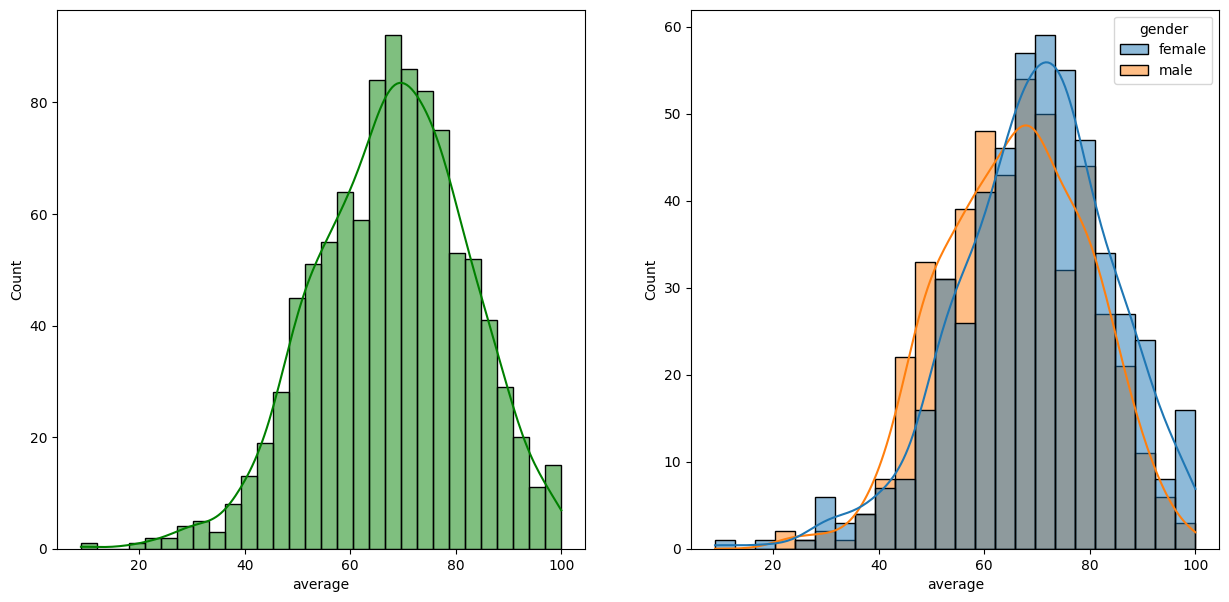

In [21]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

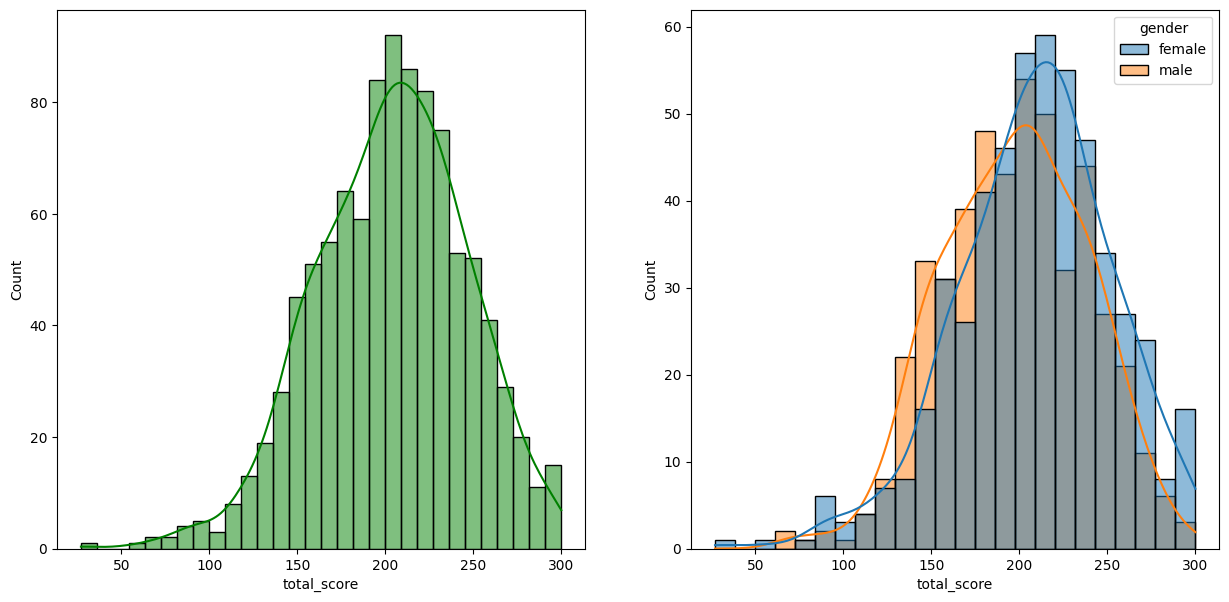

In [22]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

#### Insights

<ul><li>Female students tend to perform well then male students.</li></ul>

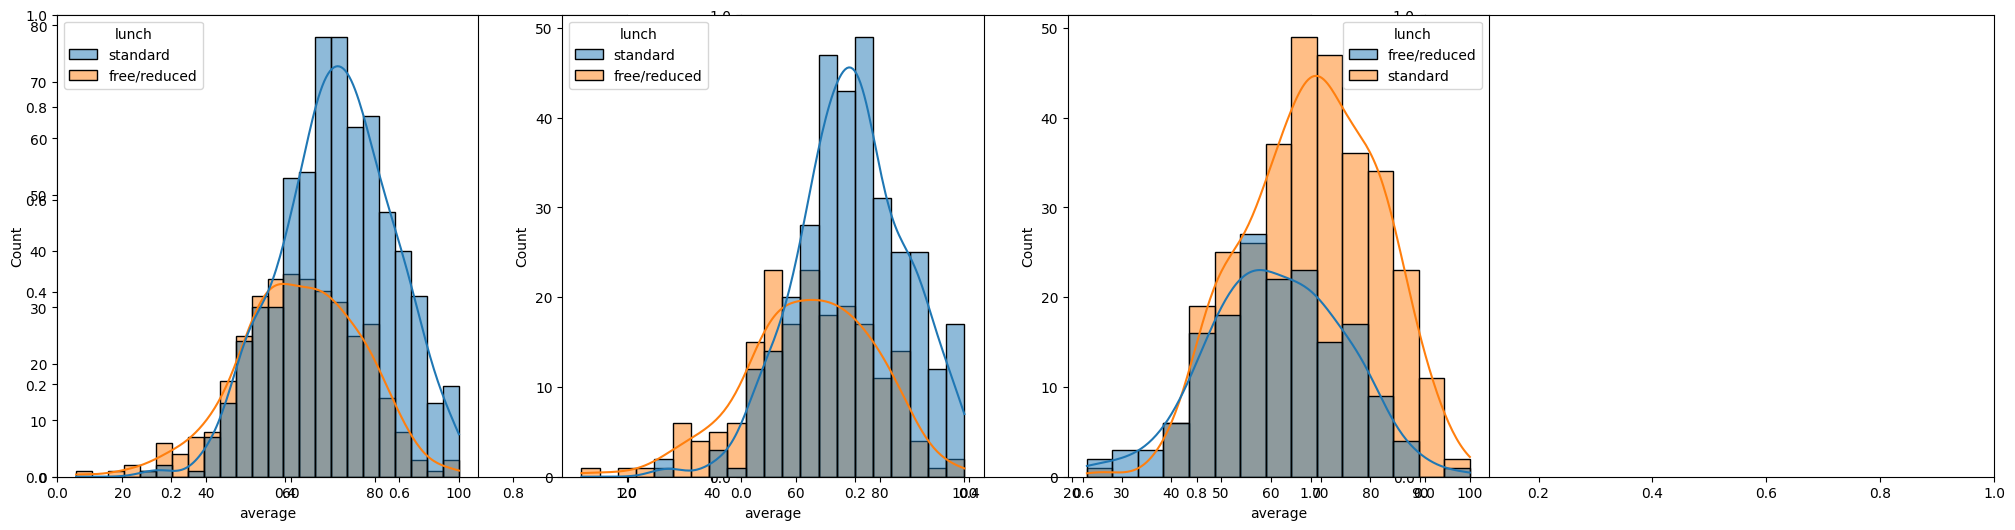

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#### Insights

<ul><li>Standard lunch helps perform well in exams.</li>
<li>Standard lunch helps perform well in exams be it a male or a female</li></ul>

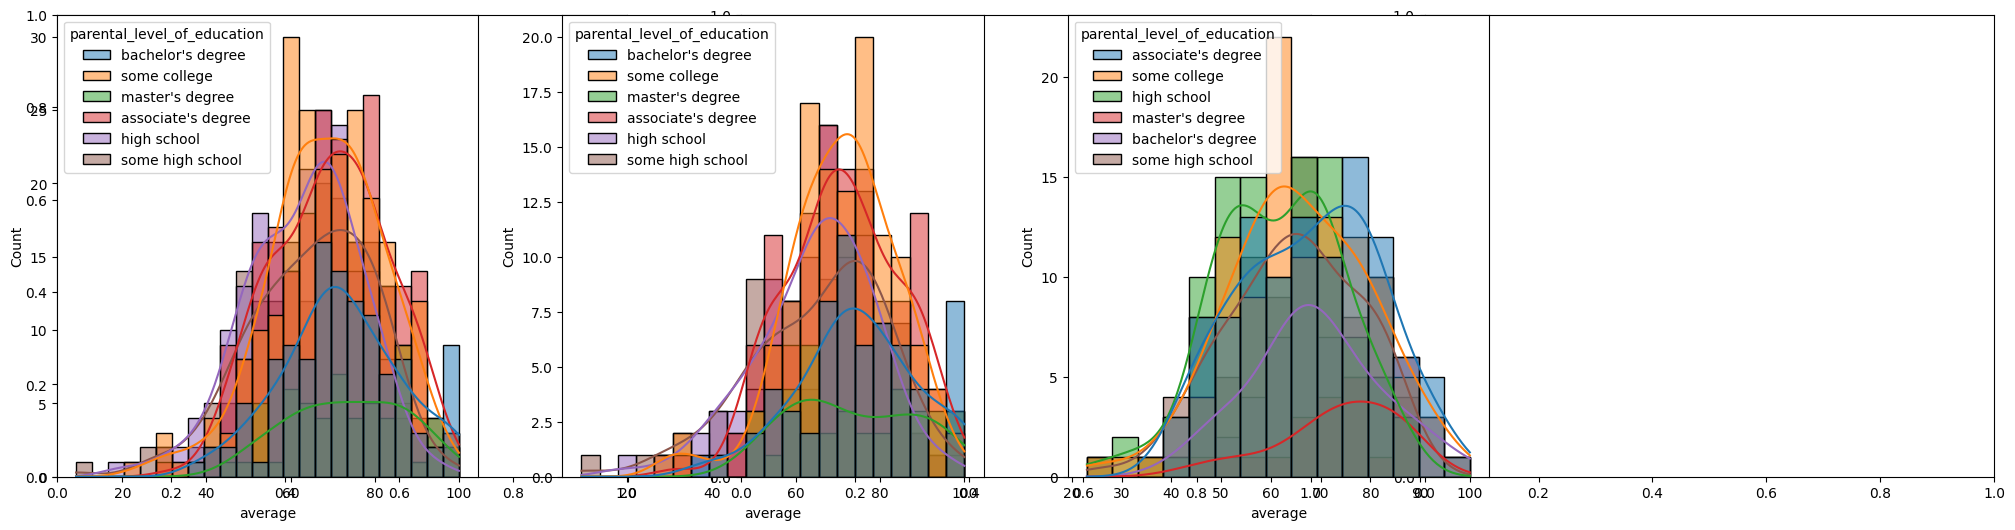

In [27]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

#### Insights

<ul><li>In general parent's education don't help student perform well in exam.</li>
<li>2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam</li>
<li>3rd plot we can see there is no effect of parent's education on female students.</li></ul>

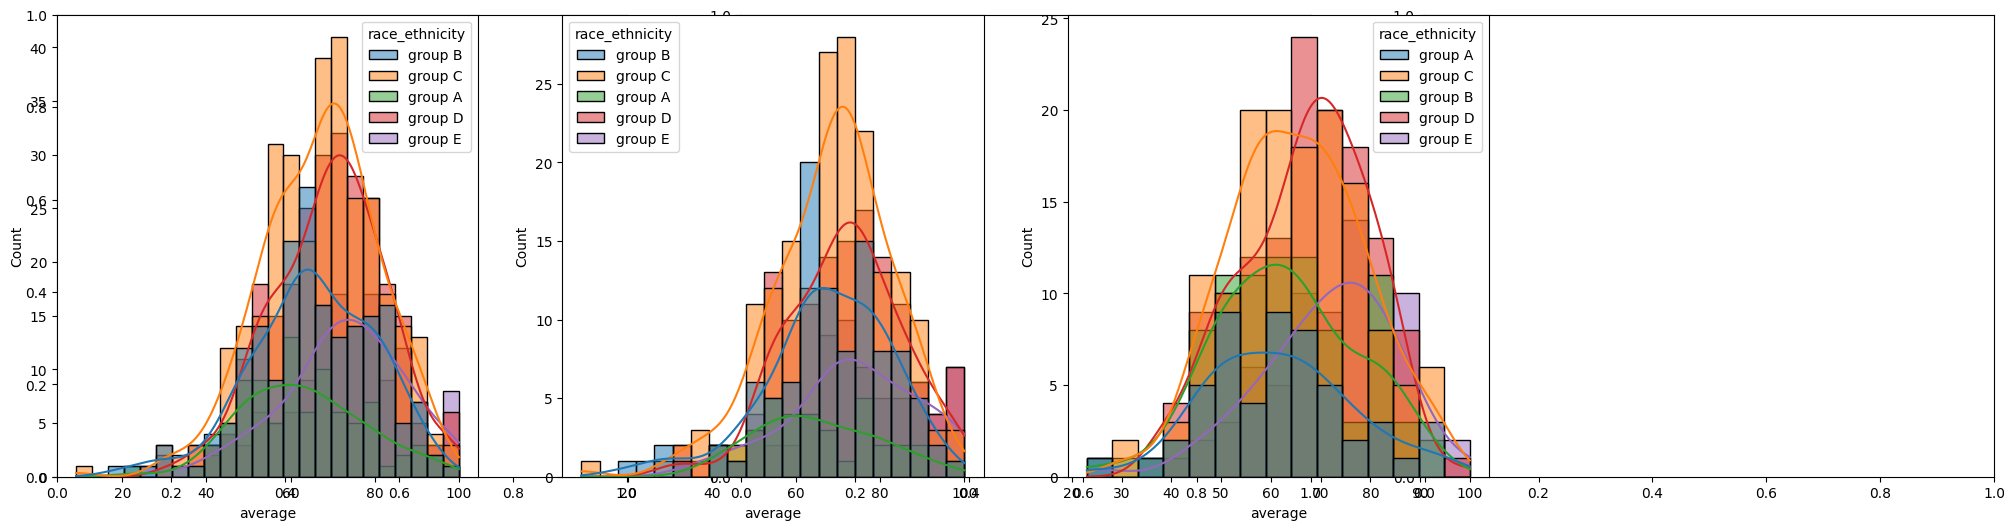

In [28]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

### Insights

<ul><li>Students of group A and group B tends to perform poorly in exam.</li>
<li>Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female</li></ul>

## 4.2 Maximumum score of students in all three subjects

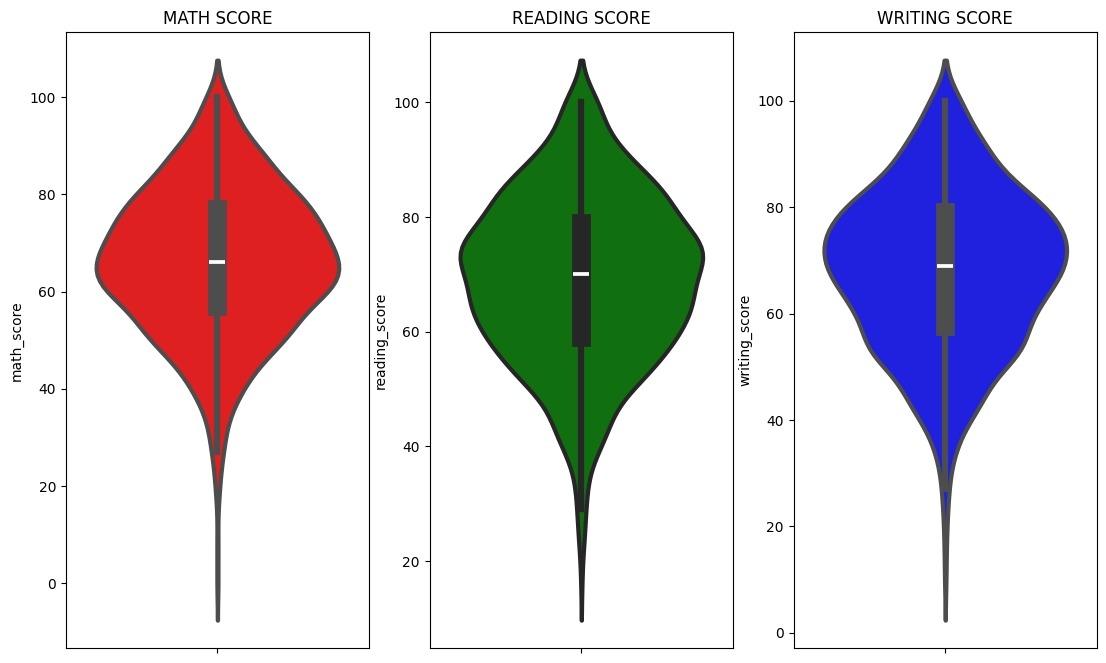

In [29]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORE')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORE')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORE')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

### Insights

<ul><li>From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80</li></ul>

### 4.3 Multivariate analysis using pieplot

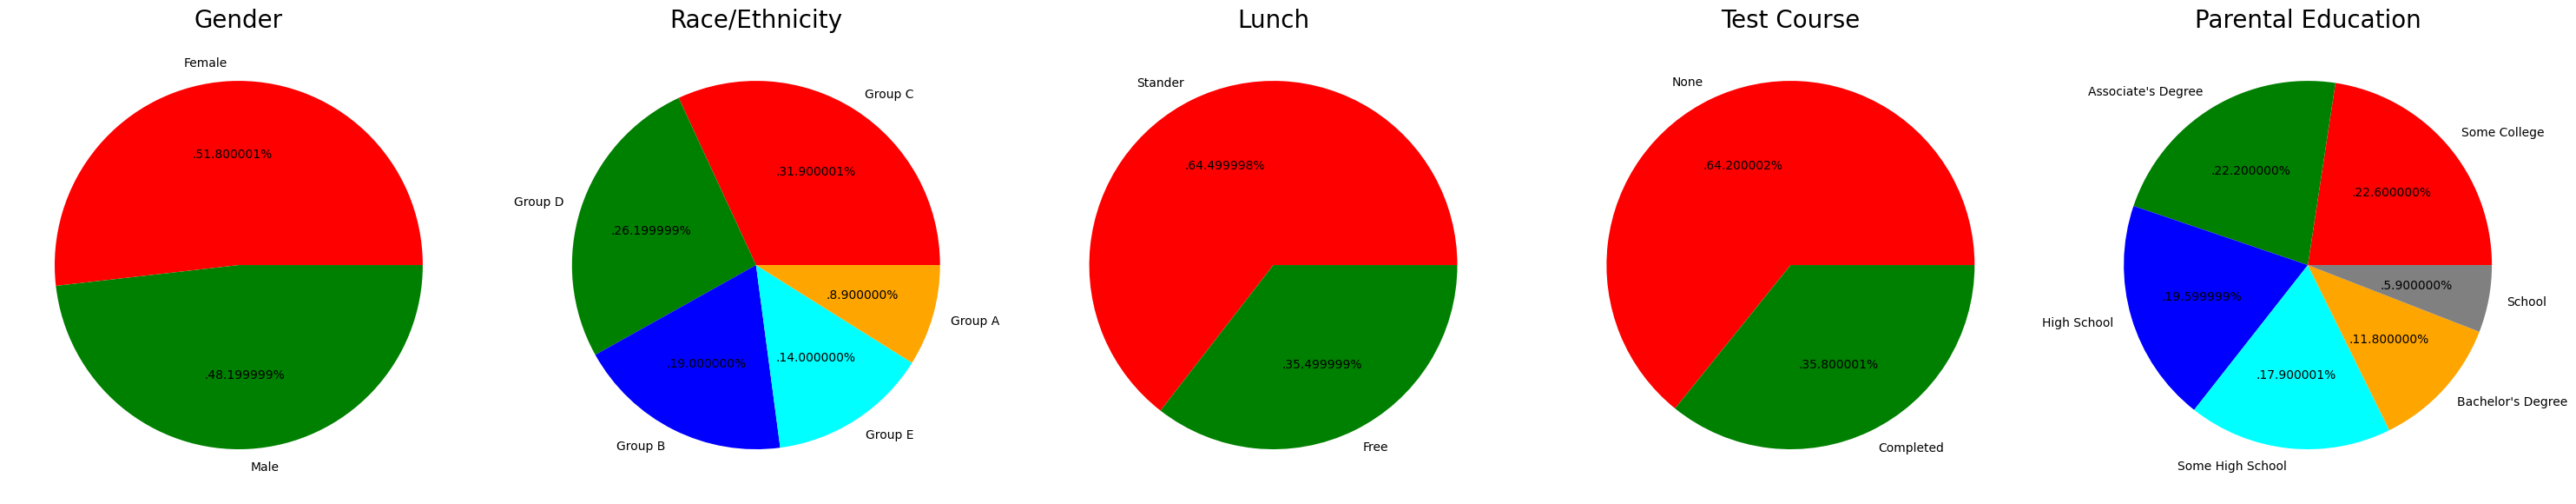

In [38]:
plt.rcParams['figure.figsize']=(30,12)
plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='Female','Male'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels='Group C','Group D','Group B','Group E','Group A'
color=['red','green','blue','cyan','orange']
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Race/Ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels='Stander','Free'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size=df['test_preparation_course'].value_counts()
labels='None','Completed'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Test Course',fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size=df['parental_level_of_education'].value_counts()
labels=labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","School"
color=['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Parental Education',fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

### Insights

<ul><li>Number of Male and Female students is almost equal</li>
<li>Number students are greatest in Group C</li>
<li>Number of students who have standard lunch are greater</li>
<li>Number of students who have not enrolled in any test preparation course is greater</li>
<li>Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"</li></ul>

### 4.4 Feature Wise Visualization

### 4.4.1 GENDER COLUMN

<ul><li>How is distribution of Gender ?</li>
<li>Is gender has any impact on student's performance ?</li></ul>

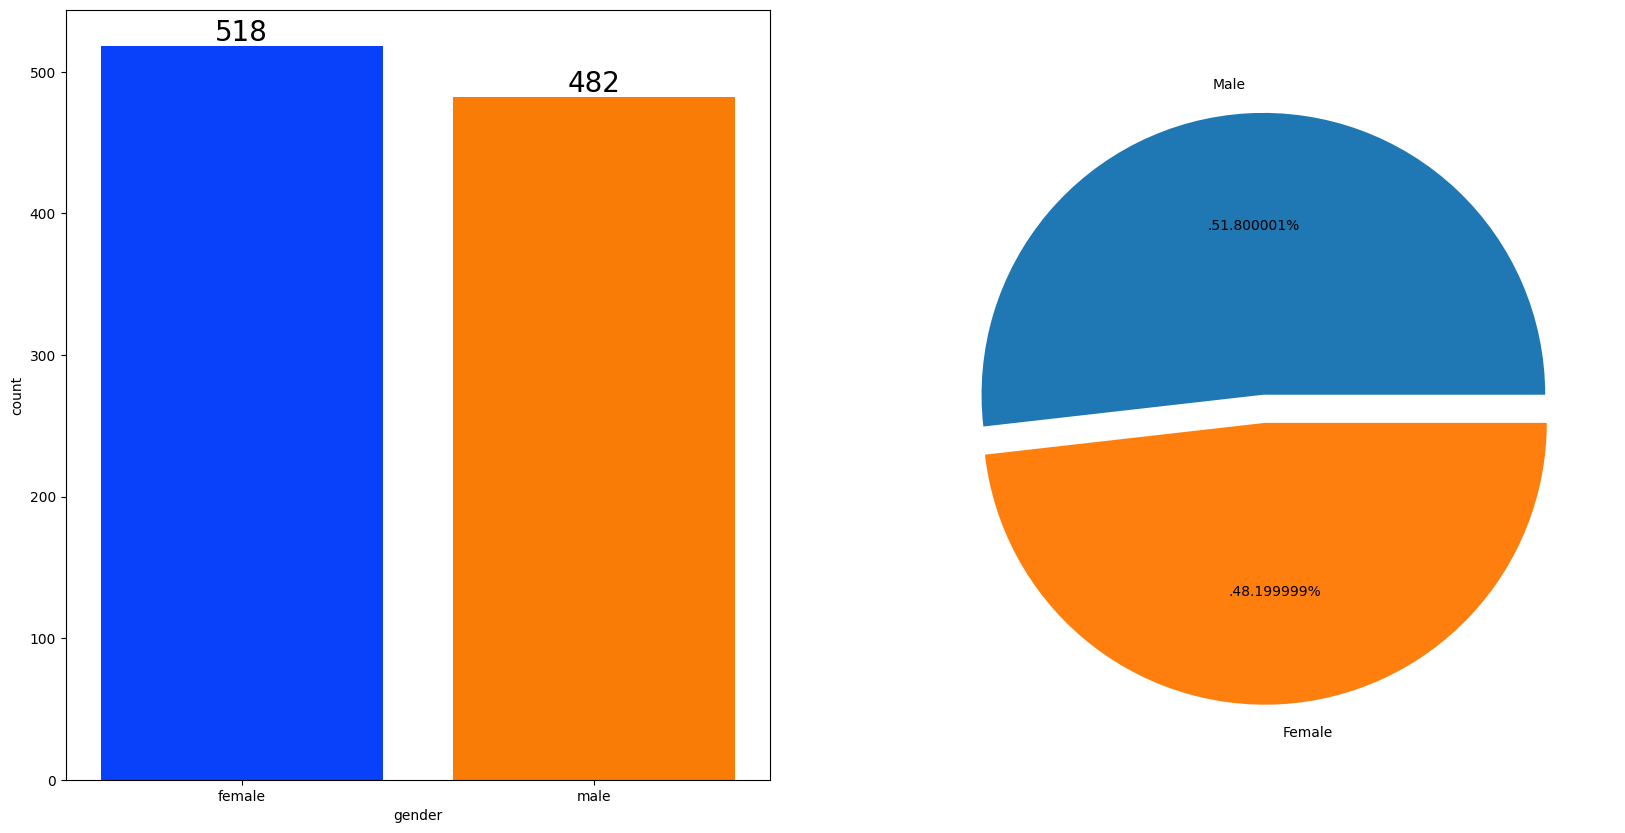

In [41]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='.%2f%%' )
plt.show()

### Insights

<ul><li>Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)</li></ul>

### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ?

### 4.4.2 RACE/EHNICITY COLUMN

### UNIVARIATE ANALYSIS ( How is Group wise distribution )?

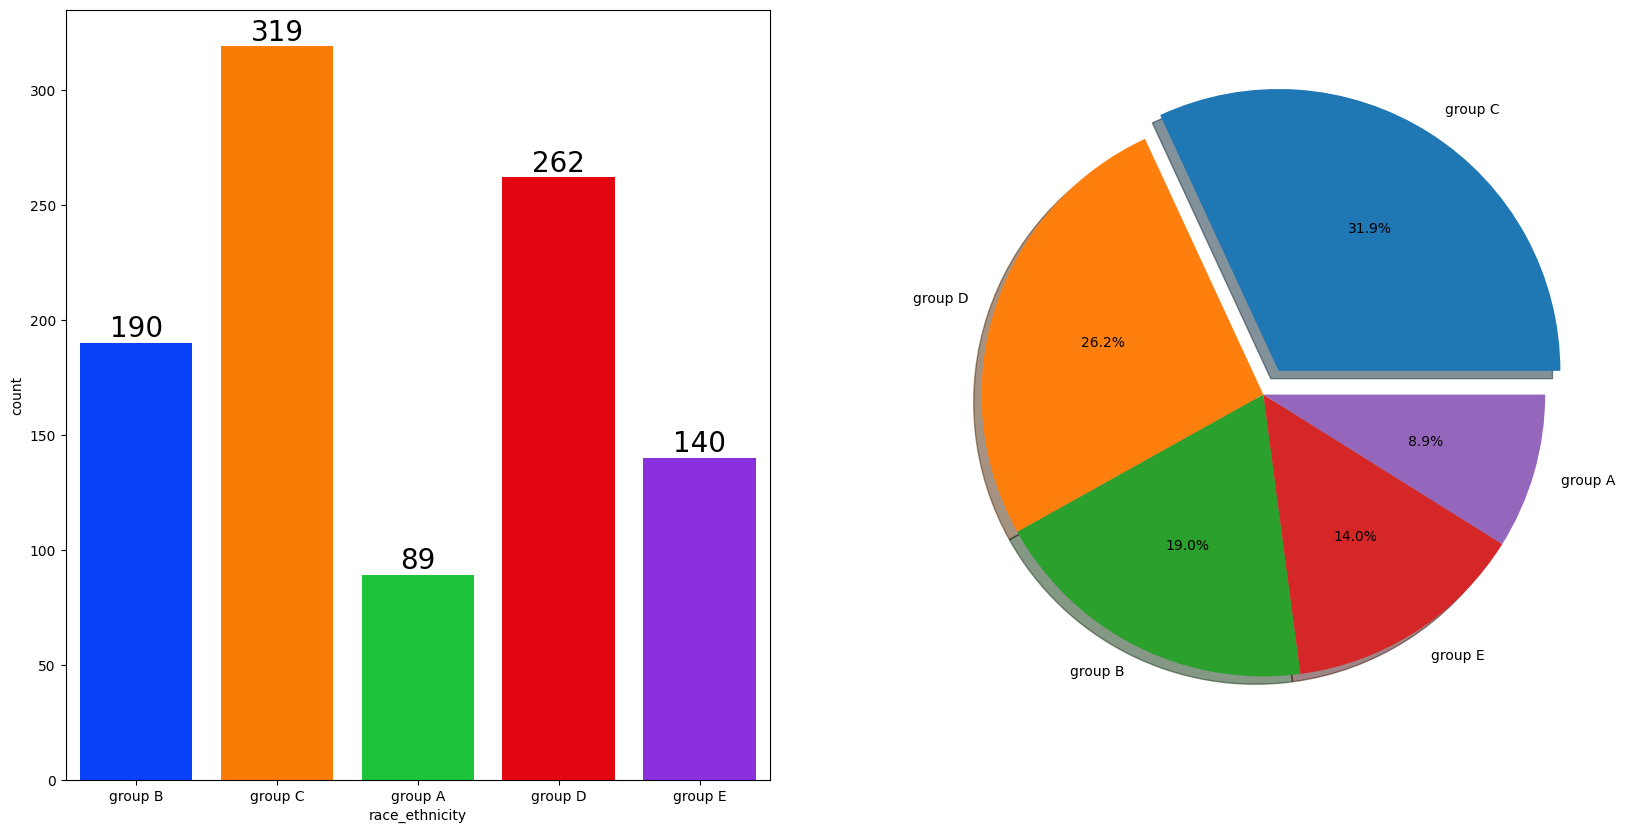

In [53]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  

#### Insights

<ul><li>Most of the student belonging from group C /group D.</li>
<li>Lowest number of students belong to groupA.</li></ul>

### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance) ? 

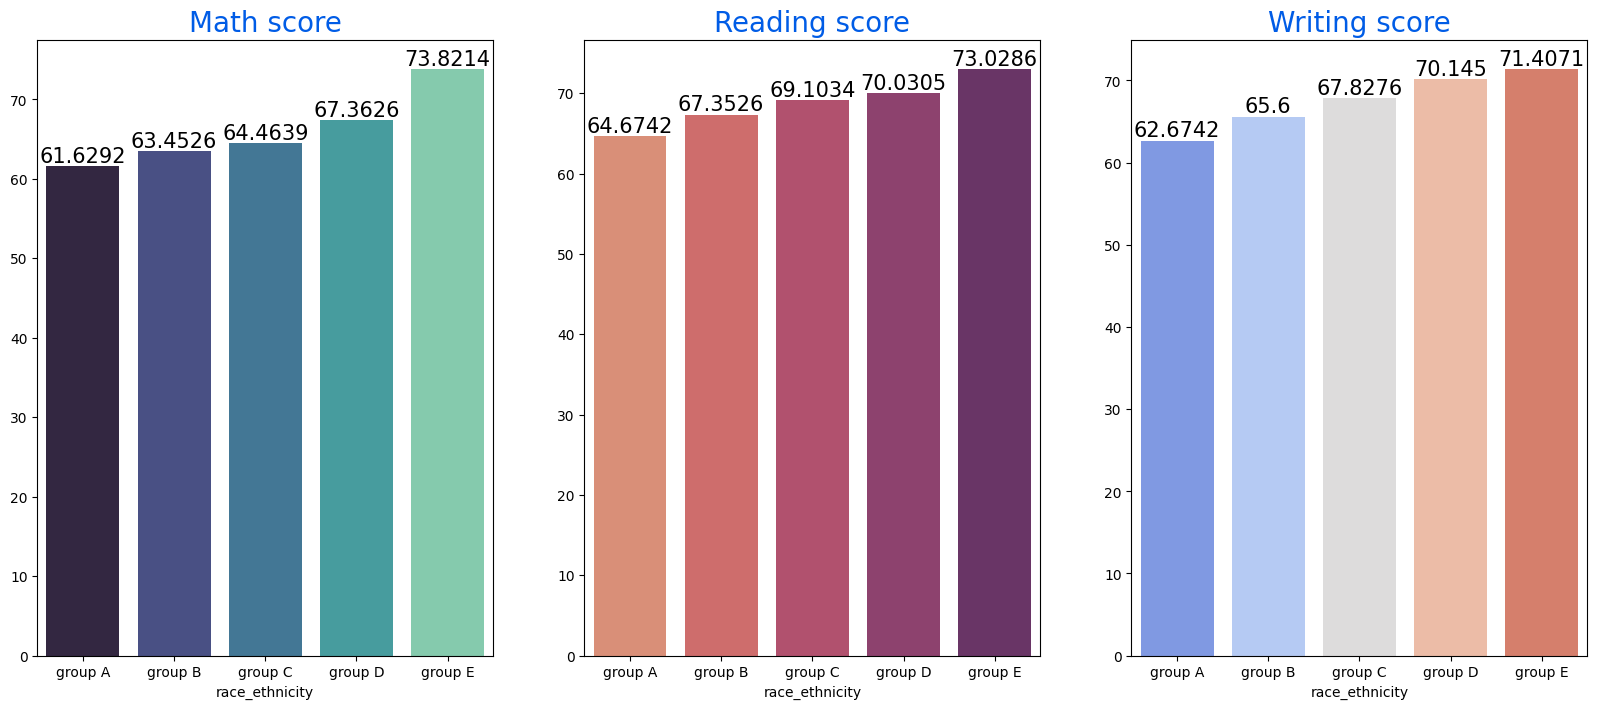

In [54]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights

<ul><li>Group E students have scored the highest marks.</li>
<li>Group A students have scored the lowest marks.</li>
<li>Students from a lower Socioeconomic status have a lower avg in all course subjects</li></ul>

### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN

<ul><li>What is educational background of student's parent ?</li>
<li>Is parental education has any impact on student's performance ?</li></ul>

### UNIVARIATE ANALYSIS ( What is educational background of student's parent) ?

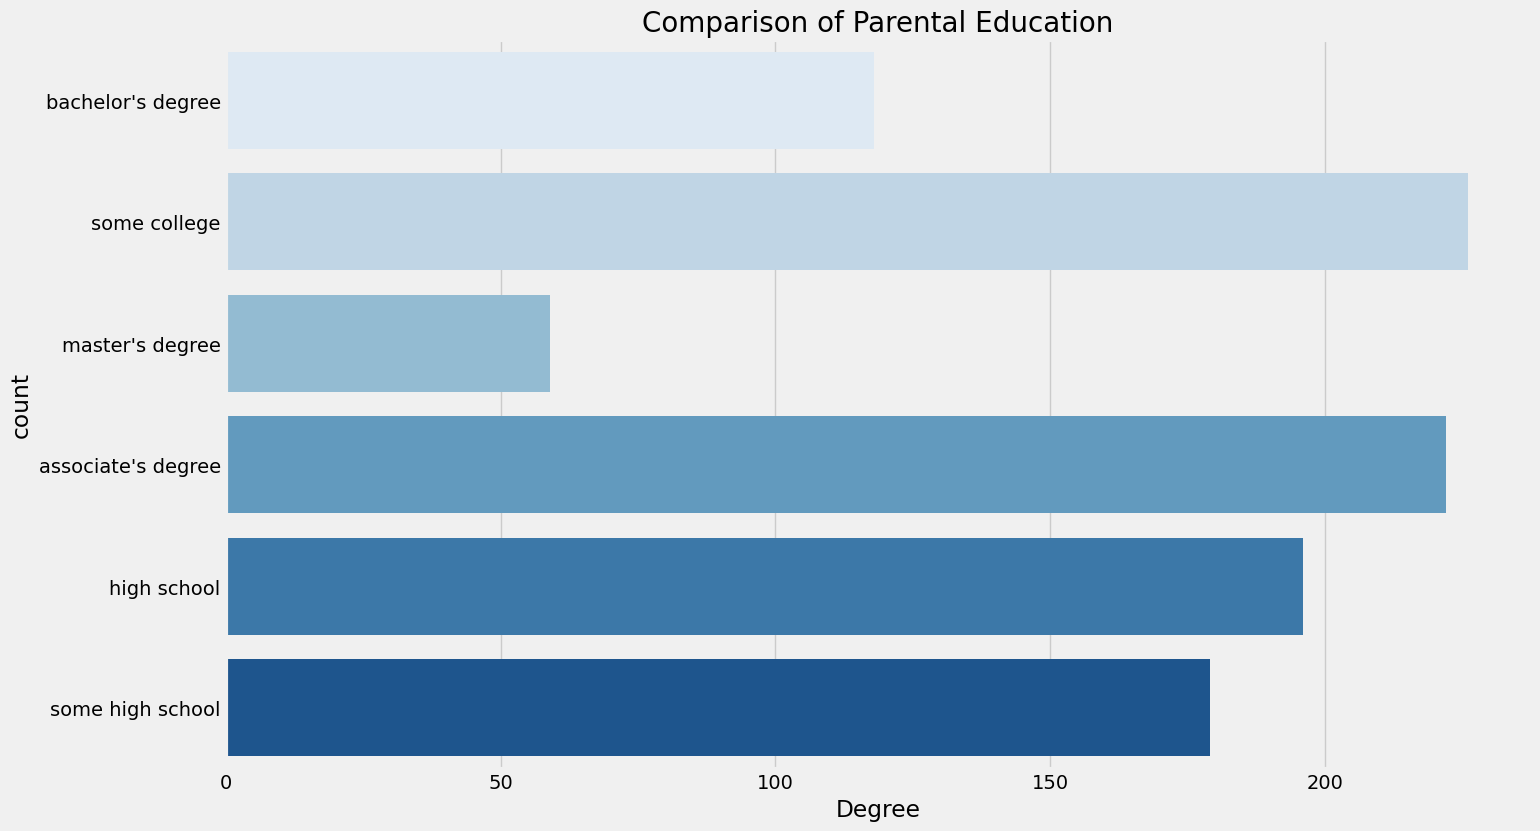

In [55]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()


#### Insights

<ul><li>Largest number of parents are from some college</li></ul>

### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance) ? 